### Neural Networks Layers

* Convoltional Layers 2D
* Max Pooling Layer 2D
* Dense Output Layer 

In [77]:
import mxnet as mx
from mxnet import nd # nD arrays
from mxnet.gluon import nn # Neural Netowrks

In [78]:
from matplotlib import pyplot as plt

### Convoltional Layer 2D

In [79]:
# Creating a Neural Network (Convotional Based 2D)
layer = nn.Conv2D( channels = 1, # output  channel (how many outputs)
                    kernel_size = (3,3), # Filter layer 
                    strides=(1, 1), # Strides (corner 
                    padding=(0, 0), # paddimg information
                    layout='NCHW', # NCHW layer 
                    activation='relu', # Activation function 
                    use_bias=True, # it self will add in the bias
                    weight_initializer=None, # Initialze it with some weights (can be useful in case of Transfer learning)
                    bias_initializer='zeros', # Initialized bias value be 0
                    in_channels=1, # input channel will recieve 1
                  prefix = 'conv_')


# This is one channel and it would be vertical filter applicable 


#### Filter (Kernal)
* A Sobal Vertical Kernel or Filter which can be useed is of array :
    * [-1,0,1],[-2,0,2],[-1,0,1]
* A sobel Horizental kernel filter is as follows 
    * [-1,2,-1],[0,0,0],[1,2,1]

In [80]:
layer.initialize(mx.init.Constant([
    [-1,0,1],[-2,0,2],[-1,0,1]
]))
# This is a Sobel 

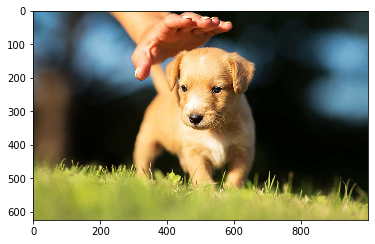

In [81]:
o = plt.imshow(plt.imread('dd.jpg'))

In [82]:
# reading in te image using mxnet
image = mx.image.imread('dd.jpg',0).astype('float32') # reading an image with type float32
image.shape # Since its HWC
# This needs to be changed to CHW hence


(625, 1000, 1)

In [83]:
image.transpose((2,0,1)).shape # Transpose based on a tuple. # the tupple represents the array swap or change 
image_channel_first = image.transpose((2,0,1))

In [84]:
image_batchified = image_channel_first.expand_dims(axis = 0) # Expand dimention with axis be 0

In [85]:
image_batchified.shape

(1, 1, 625, 1000)

In [86]:
output = layer(image_batchified) # passing in the image to the neural network # Passed through the network 

# The model will detect the vertical edges for the image

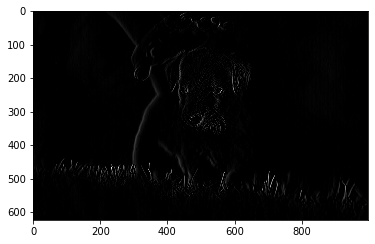

In [87]:
o = plt.imshow(output.squeeze().asnumpy(), cmap = 'gray') # Show the squeezed image and convert into numpy having the cmap to be grey

#### Parameters

In [88]:
# Each gluon block can have zero or more parameters
layer.collect_params()

# Weights and Bias 1 output , 1 input and 3x3 image 

conv_ (
  Parameter conv_weight (shape=(1, 1, 3, 3), dtype=<class 'numpy.float32'>)
  Parameter conv_bias (shape=(1,), dtype=<class 'numpy.float32'>)
)

In [89]:
# You can also collect weights based onthe foolwoing 
layer.collect_params()['conv_weight'] # You can either collect this way or 
layer.weight


Parameter conv_weight (shape=(1, 1, 3, 3), dtype=<class 'numpy.float32'>)

In [90]:
# if you want to check the data which the convotional has can be definned as follows
layer.weight.data() # gets the data 


[[[[-1.  0.  1.]
   [-2.  0.  2.]
   [-1.  0.  1.]]]]
<NDArray 1x1x3x3 @cpu(0)>

In [91]:
layer.bias.data() # gets the biad data


[0.]
<NDArray 1 @cpu(0)>

#### Max pooling feature 


In [92]:
layer = nn.MaxPool2D(pool_size=(4,4)) 
layer # check the max pooling layer 

MaxPool2D(size=(4, 4), stride=(4, 4), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)

In [93]:
pooled = layer(output) # passing in the previous passed image from the convotional layer 


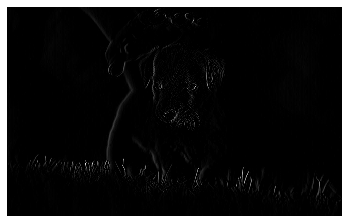

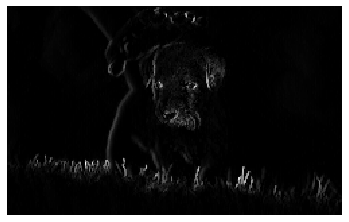

In [94]:
plt.imshow(output.squeeze().asnumpy(), cmap = 'gray') # showing in the convotional image 
plt.axis('off')
plt.show()


plt.imshow(pooled.squeeze().asnumpy(), cmap = 'gray') # shows the pooled image which is bought back from the network

o = plt.axis('off')

In [95]:
layer.collect_params() # there are no parametertsr

pool2_ (

)

#### Dense Layer


In [96]:
layer = nn.Dense(units = 10, in_units = 3 , activation = 'relu') # once the output functin is coated apply the relu function 
layer

Dense(3 -> 10, Activation(relu))

In [97]:
layer.initialize(mx.init.One()) # layer intializtation with one

In [98]:
inputs = mx.nd.ones((1,3)) # with inputs 1x3 the layers

In [99]:
inputs


[[1. 1. 1.]]
<NDArray 1x3 @cpu(0)>

In [100]:
#Check and applyu the inputs and see what actually happens

In [101]:
inputs , = layer(inputs)

In [102]:
inputs


[3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
<NDArray 10 @cpu(0)>

In [103]:
layer.weight.data() # check whether the data in the layer is same


[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
<NDArray 10x3 @cpu(0)>